In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from google.colab.patches import cv2_imshow

In [8]:
import cv2
import numpy as np

# Load YOLO model from disk
net = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/YOLO/Copy of yolov4.cfg', '/content/drive/MyDrive/YOLO/Copy of yolov4.weights')

# Load the input image and extract its dimensions
image = cv2.imread('dog.jpg')
h, w = image.shape[:2]

# Determine the output layer names from the YOLO model
layer_names = net.getUnconnectedOutLayersNames()

# Create a blob from the image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Set the input for the network
net.setInput(blob)

# Perform a forward pass through the YOLO network
outs = net.forward(layer_names)

# Lists to store the bounding boxes and their confidences
boxes = []
confidences = []

# Collect bounding boxes and confidences
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(detection[0] * w)
            center_y = int(detection[1] * h)
            width = int(detection[2] * w)
            height = int(detection[3] * h)
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)

            boxes.append([x, y, width, height])
            confidences.append(float(confidence))

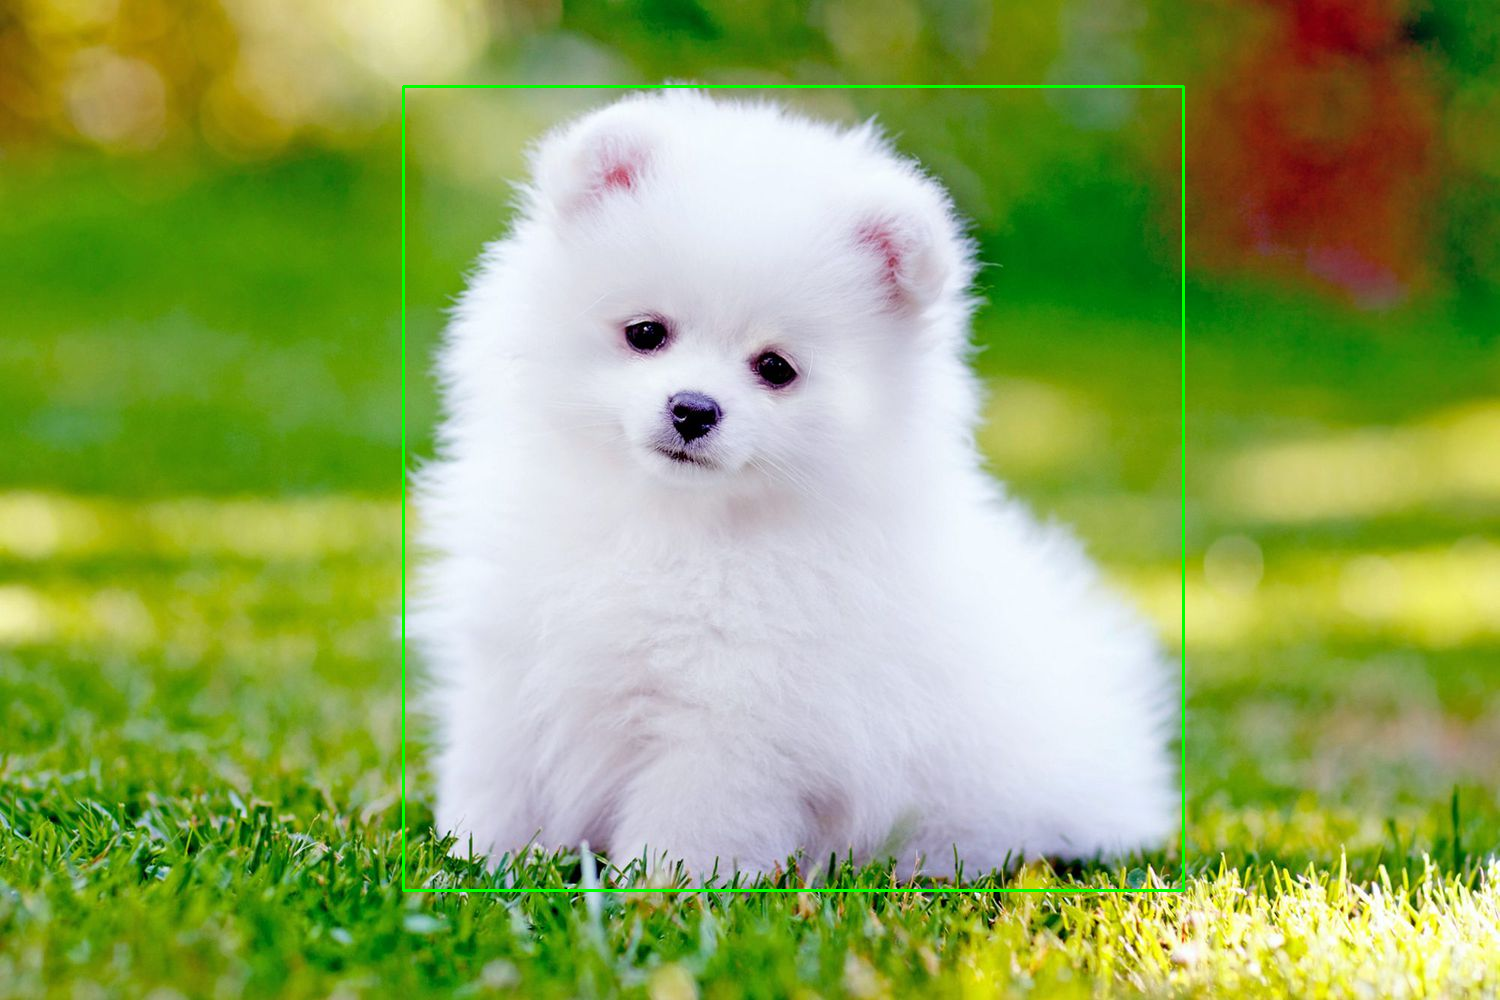

In [11]:
# Apply Non-Maximum Suppression (NMS) to filter out duplicate detections
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

for i in indices:
    box = boxes[i]
    x, y, width, height = box

    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)


cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()